# Lab N
### Morphology

Skimage morphology operators' documentation:
https://scikit-image.org/docs/dev/api/skimage.morphology.html

In [2]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle

# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

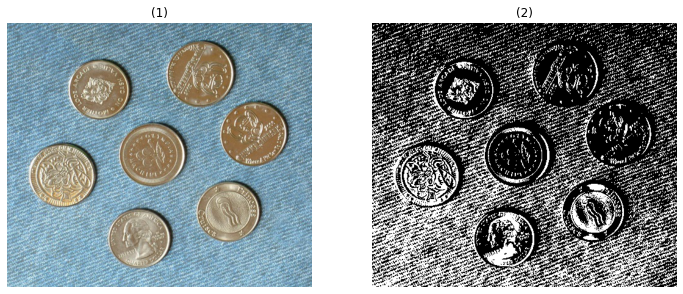

In [3]:
def binary(img,threshold):
    binary_img=np.where(rgb2gray(img)*255>threshold,1,0)
    return binary_img

img =io.imread('img/coins.jpg')
show_images([img,binary(img,160)])

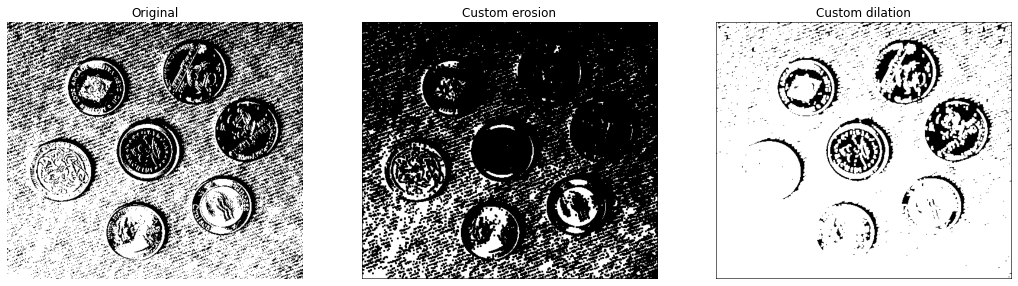

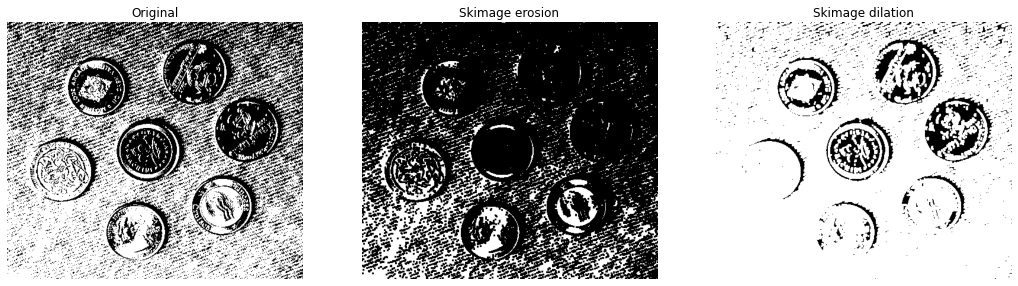

In [4]:
'''
1) Erosion / Dilation:
    - Load "coins.jpg" from the img folder
    - Convert the image to binary
    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the binary image
    - Use Skimage's "binary_erosion" & "binary_dilation" & show the results
'''

def custom_erosion(img,se):
    temp=np.zeros(img.shape)
    x=se.shape[0]//2
    y=se.shape[1]//2
    for i in range (x,img.shape[0]-x,1):
        for j in range (y,img.shape[1]-y,1):
            temp[i][j]=np.all(img[i-x : i+x+1 , j-y :j+y+1 ])
    return temp        

    
    
def custom_dilation(img,se):
    temp=np.zeros(img.shape)
    x=se.shape[0]//2
    y=se.shape[1]//2
    for i in range (x,img.shape[0]-x,1):
        for j in range (y,img.shape[1]-y,1):
            if((img[i-x:i+x+1,j-y:j+y+1]).any()):
                temp[i][j]=1
            else:
                temp[i][j]=0
    return temp   
    
    
img =io.imread('img/coins.jpg')
binary_img=binary(img,140)   
eroded=custom_erosion(binary_img,np.ones((3,3)))
dilated=custom_dilation(binary_img,np.ones((3,3)))
show_images([binary_img,eroded,dilated],["Original","Custom erosion","Custom dilation"])
show_images([binary_img,binary_erosion(binary_img,np.ones((3,3))),binary_dilation(binary_img,np.ones((3,3)))],["Original","Skimage erosion","Skimage dilation"])





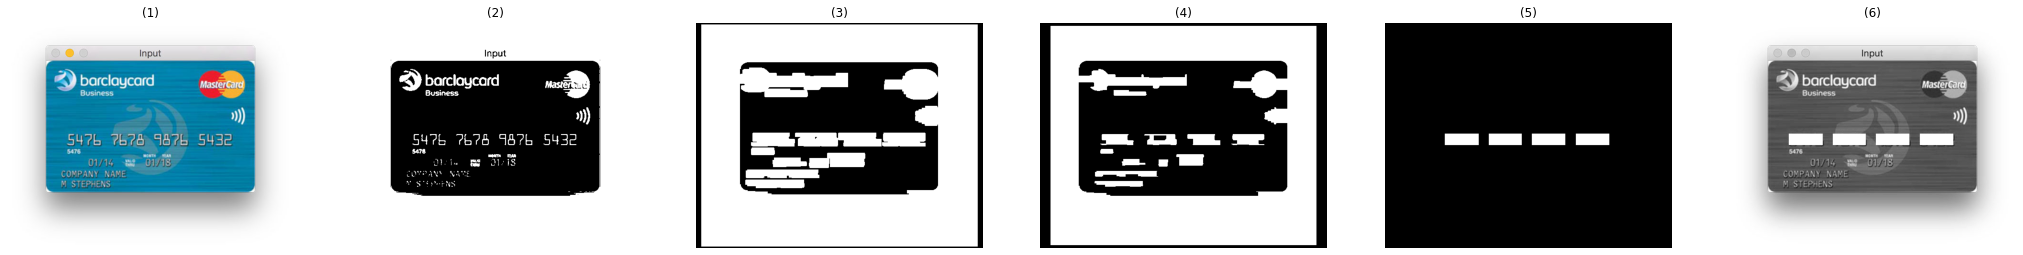

In [7]:
'''
2) Case Study: Credit Card Number Extraction
    - Load "card.jpg" from the img folder
    - Convert the image to binary by brightness thresholding maintaining the card number details for extraction
    - Use your erosion/dilation functions, or Skimage's functions only if you didn't implement them, to apply closing
        Note: The goal of this step is to join the card number into 4 sets of connected pixels
    - Use Skimage's "find_contours" to get the bounding boxes for the credit card's numbers by filtering on aspect ratio (between 2.5 & 3.5)
        Note: When using "find_contours(img, 0.8)" the o/p is a list of contours each having:
                - contour[:,0] being the Y values of the contour perimeter points
                - contour[:,1] being the X values of the contour perimeter points
'''
img = io.imread('img/card.jpg')
binary_img = binary(img, 150)
dilated=custom_dilation(binary_img,np.ones((7,23)))
closed=custom_erosion(dilated,np.ones((7,23)))
img_with_boxes1 = np.zeros(img.shape)
img_with_boxes2 = np.copy(rgb2gray(img))
contours = find_contours(closed, 0.8)
#print(contours)

bounding_boxes = []
for contour in contours:
    box = [min(contour[:, 1]), max(contour[:, 1]), min(contour[:, 0]), max(contour[:, 0])]
    ratio =  abs(box[0] - box[1]) / abs(box[2] - box[3])
    if(ratio >= 2.5 and ratio <= 3.5): 
        if(box[3]-box[2]>15):
            bounding_boxes.append(box)

#When provided with the correct format of the list of bounding_boxes, this section will set all pixels inside boxes in img_with_boxes
for box in bounding_boxes:
    [Xmin, Xmax, Ymin, Ymax] = box
    rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=img.shape)
    img_with_boxes1[rr.astype(int), cc.astype(int)] = 1 #set color white
    img_with_boxes2[rr.astype(int), cc.astype(int)] = 1
    
show_images([img,binary_img,dilated,closed,img_with_boxes1,img_with_boxes2])


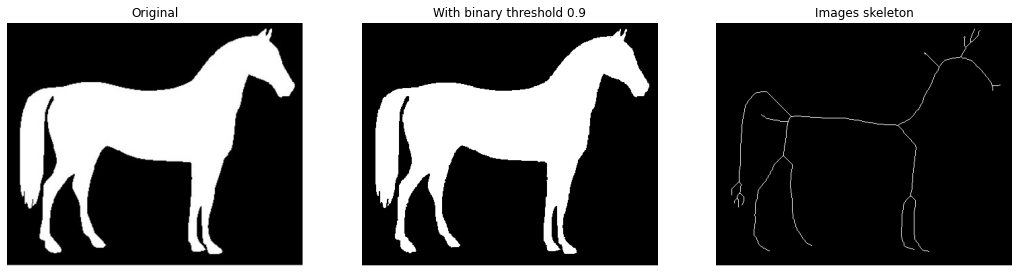

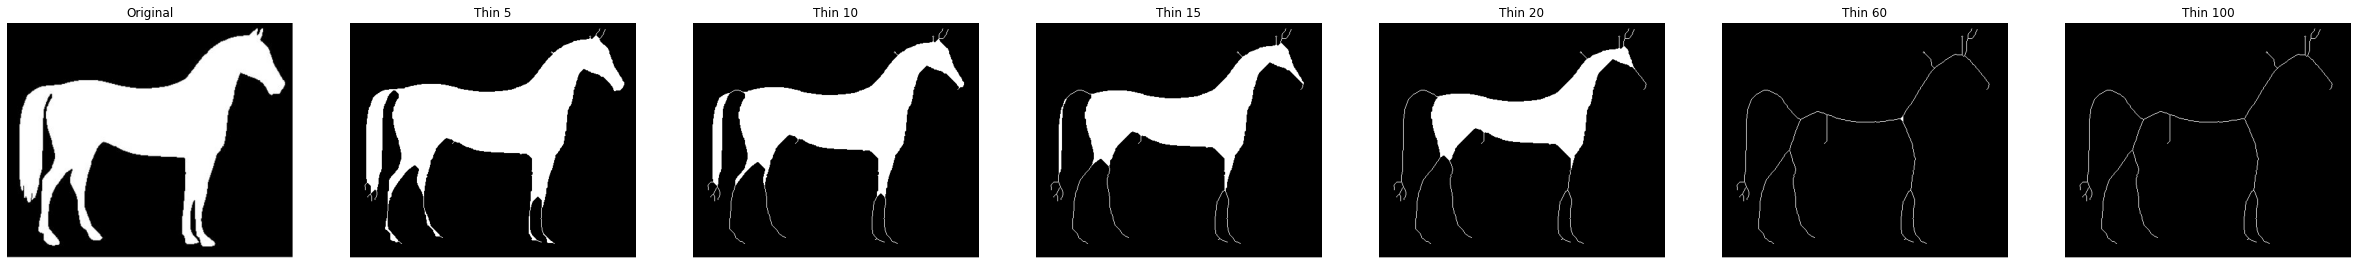

In [10]:
'''
3) Skeletonization:
    - Load "horse.jpg" from the img folder 
    - Use a binary threshold of 0.9 to remove invisible noise in the background
    - Use Skimage's "skeletonize(image)" to acquire the image's skeleton & show it
    - Use Skimage's "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it
'''

img = io.imread('img/horse.jpg')
binary_img=binary(img,0.9*255)
show_images([img,binary_img,skeletonize(binary_img)],['Original','With binary threshold 0.9','Image''s skeleton'])
show_images([img,thin(binary_img,5),thin(binary_img,10),thin(binary_img,15),thin(binary_img,20),thin(binary_img,60),thin(binary_img,100)],["Original","Thin 5","Thin 10","Thin 15","Thin 20","Thin 60","Thin 100"])


#Skeletonization reduces binary objects to 1 pixel wide representations. This can be useful for feature extraction, and/or representing an object’s topology.
#Morphological thinning, implemented in the thin function, works on the same principle as skeletonize: remove pixels from the borders at each iteration until none can be removed without altering the connectivity. The different rules of removal can speed up skeletonization and result in different final skeletons.